In [1]:
# Import libraries
# Common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [2]:
######################################################
########## List of functions #########################
######################################################

# Function to check if a variable could be cast to float
def check_var(var,i):
    try:
        float(var)
    except:
        return var,i

In [3]:
# Read the Data
df = pd.read_csv('winequality.csv',sep=';')
df[:5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Some information about the dataframe
print("Lenght of the dataframe: "+str(len(df))+". Number of target: "+str(len(df.columns)-1)+".")
# Show types of column
print("Initial types of column:\n"+str(df.dtypes))
# Create a Label encoder of 'type'
le = preprocessing.LabelEncoder()
df["type sc"] = le.fit_transform(df["type"])
# Cast 'alcohol' to float 
# Find values in 'alcohol' that could not be casted to float
not_cast = []
for i in range(len(df['alcohol'].values)):
    try_ = check_var(df['alcohol'].values[i],i)
    if try_!=None:
        var,j = check_var(df['alcohol'].values[i],i)
        not_cast.append([var,j])
# Drop lines from Dataframe that could not be cast to float
df = df.drop(np.array(not_cast)[:,1].astype(int),axis='index')
df['alcohol'] = df['alcohol'].astype(float)
# Show final types of column
print("\n \n Final types of column:\n"+str(df.dtypes))

Lenght of the dataframe: 6497. Number of target: 12.
Initial types of column:
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object

 
 Final types of column:
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type sc                   int64
dtype: object


Number of null values for column:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type sc                 0
dtype: int64


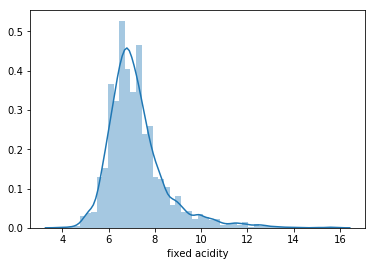

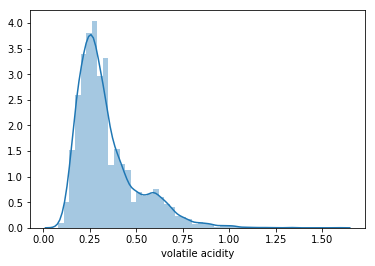

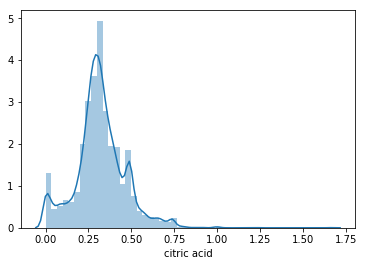

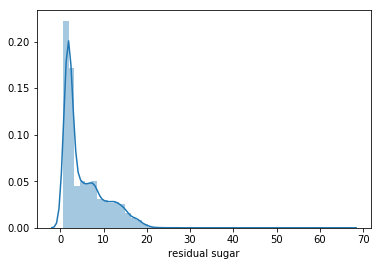

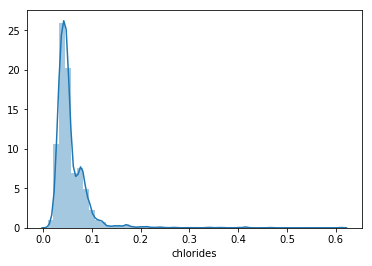

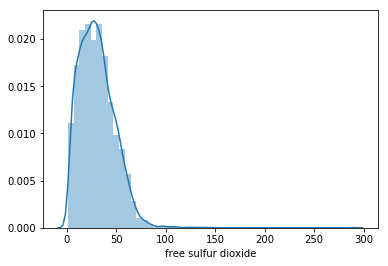

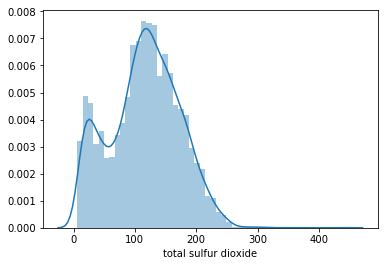

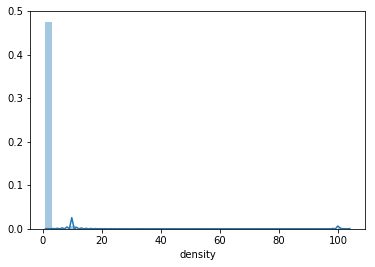

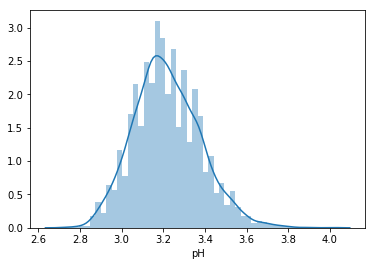

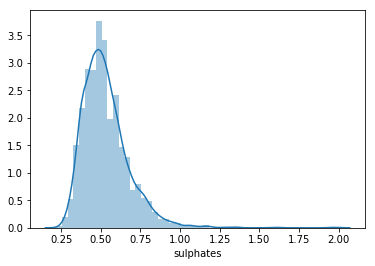

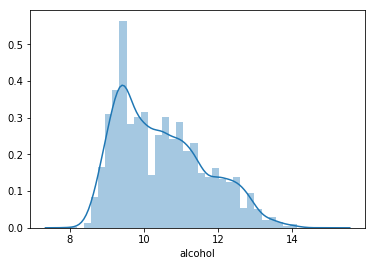

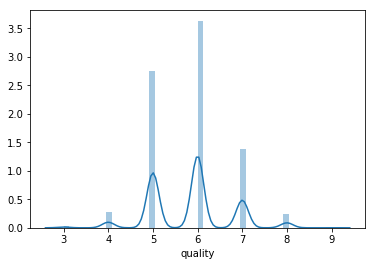

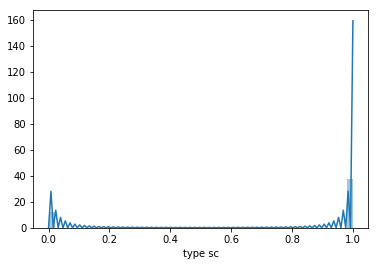

In [5]:
# A little bit of statistics
print("Number of null values for column:\n"+str(df.isnull().sum(axis = 0)))
# Print distribution for each 
for col_name in np.delete(df.columns.values,0):
    plt.figure()
    sns.distplot(df[col_name])

In [6]:
##############################################################
# Reflexions
# The only really strange distribution is the density. In my
# opinion ir oculd be a really important feature, or it could 
# a problem for the analysis.
# I will train the algorithm with and without that variable.
# Furthermore I will train the algorithm with and without the onehotencoding in whine

In [7]:
# Analysis of the target 
print("There are the following unique values in 'quality':\n"+str(df['quality'].unique()))
# A the only classes present in the data are: 3,4,5,6,7,8,9. I can only classify the wines in these 7 classes
# I will not have wines with 'quality' 0,1,2, and 10
print("Count number of lines for each different target:\n"+str(df['quality'].value_counts()))

There are the following unique values in 'quality':
[6 5 7 8 4 3 9]
Count number of lines for each different target:
6    2815
5    2129
7    1069
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [8]:
#####################################
# Classification problem
# I need a multiclass classifier.
# For that reason I try two methods: RandomForest and neuronal network
# First I define the training set and the test set first with the variable 'density'
features_col = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
        'type sc']
X = df[features_col].values
y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("Count classes in y_train:\n "+str(pd.Series(y_train).value_counts()))
print("Count classes in y_test:\n "+str(pd.Series(y_test).value_counts()))
# The data are to unbalanced. It is necessary an oversampling
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
print("Count classes in y_train:\n "+str(pd.Series(y_train).value_counts()))


Count classes in y_train:
 6    2257
5    1701
7     854
4     172
8     152
3      24
9       5
dtype: int64
Count classes in y_test:
 6    558
5    428
7    215
4     44
8     41
3      6
dtype: int64
Count classes in y_train:
 7    2257
6    2257
5    2257
4    2257
3    2257
9    2257
8    2257
dtype: int64


In [9]:
#################################
# Random Forest Classifier 
parameters = {
    'n_estimators':[300],
    'criterion':['gini'],
    'max_depth':[5,10,15,20,25,30],
    'min_samples_leaf': [1,2,3,5,8,10,12,15,20],
    'max_features':['auto','log2']       
}
rf = RandomForestClassifier()
CV_rd = GridSearchCV(rf, parameters, cv=5,n_jobs=-1)
CV_rd.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300], 'criterion': ['gini'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 3, 5, 8, 10, 12, 15, 20], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
# Analysis the result of the GridSearchCV of randomforestClassifier
print("The best parameters found by:\n "+str(CV_rd.best_params_))
classifier = CV_rd.best_estimator_
## Training prediction
y_pred = classifier.predict(X_train)
result = {"Accurancy": accuracy_score(y_train, y_pred),
          "Precision": precision_score(y_train, y_pred,average=None),
          "Recal": recall_score(y_train, y_pred,average=None),
          "Confusion Matrix":confusion_matrix(y_train, y_pred)
}
# Test prediction
y_pred = classifier.predict(X_test)
result = {"Accurancy": accuracy_score(y_test, y_pred),
          "Precision": precision_score(y_test, y_pred,average=None),
          "Recal": recall_score(y_test, y_pred,average=None),
          "Precision_MW": precision_score(y_test, y_pred,average='weighted'),
          "Recal_MW": recall_score(y_test, y_pred,average='weighted'),
          "Confusion Matrix":confusion_matrix(y_test, y_pred)
}
joblib.dump(classifier, 'random_forest.pkl') 
print(classifier.feature_importances_)
print(result)

The best parameters found by:
 {'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 300}


/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.09132195 0.0895639  0.07460636 0.08060499 0.09685744 0.09637343
 0.0828616  0.11258121 0.08373412 0.07018561 0.11637749 0.0049319 ]
{'Accurancy': 0.6888544891640866, 'Precision': array([0.        , 0.66666667, 0.71724138, 0.66507937, 0.67692308,
       0.95      ]), 'Recal': array([0.        , 0.18181818, 0.72897196, 0.75089606, 0.61395349,
       0.46341463]), 'Precision_MW': 0.6903369898846039, 'Recal_MW': 0.6888544891640866, 'Confusion Matrix': array([[  0,   0,   5,   1,   0,   0],
       [  0,   8,  22,  13,   1,   0],
       [  0,   2, 312, 112,   2,   0],
       [  0,   2,  89, 419,  48,   0],
       [  0,   0,   7,  75, 132,   1],
       [  0,   0,   0,  10,  12,  19]])}


In [11]:
#################################
# Gradient Boosting Classifier
parameters = {
    'n_estimators':[10],
    'max_depth':[5,10,15,20,25],
    'min_samples_leaf': [2,3,5,8,10,12,15],
    'max_features':['auto','log2']    
}
gb = GradientBoostingClassifier()
CV_rd = GridSearchCV(gb, parameters, cv=5,n_jobs=-1)
CV_rd.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_leaf': [2, 3, 5, 8, 10, 12, 15], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
# Analysis the result of the GridSearchCV of gradient boosting
print("The best parameters found by:\n "+str(CV_rd.best_params_))
classifier = CV_rd.best_estimator_
## Training prediction
y_pred = classifier.predict(X_train)
result = {"Accurancy": accuracy_score(y_train, y_pred),
          "Precision": precision_score(y_train, y_pred,average=None),
          "Recal": recall_score(y_train, y_pred,average=None),
          "Confusion Matrix":confusion_matrix(y_train, y_pred)
}
# Test prediction
y_pred = classifier.predict(X_test)
result = {"Accurancy": accuracy_score(y_test, y_pred),
          "Precision": precision_score(y_test, y_pred,average=None),
          "Recal": recall_score(y_test, y_pred,average=None),
          "Precision_MW": precision_score(y_test, y_pred,average='weighted'),
          "Recal_MW": recall_score(y_test, y_pred,average='weighted'),
          "Confusion Matrix":confusion_matrix(y_test, y_pred)
}
joblib.dump(classifier, 'gradient_boosting.pkl') 
print(classifier.feature_importances_)
print(result)

The best parameters found by:
 {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 10}
[0.08768153 0.09103983 0.07570708 0.0861402  0.10264085 0.09349426
 0.09250824 0.09730792 0.07986869 0.06991035 0.11900149 0.00469956]
{'Accurancy': 0.6741486068111455, 'Precision': array([0.        , 0.47368421, 0.71601942, 0.65060241, 0.67630058,
       0.7826087 ]), 'Recal': array([0.        , 0.20454545, 0.68925234, 0.77419355, 0.54418605,
       0.43902439]), 'Precision_MW': 0.6716920598454169, 'Recal_MW': 0.6741486068111455, 'Confusion Matrix': array([[  0,   0,   6,   0,   0,   0],
       [  1,   9,  17,  14,   3,   0],
       [  0,   6, 295, 119,   8,   0],
       [  0,   4,  84, 432,  35,   3],
       [  0,   0,   9,  87, 117,   2],
       [  0,   0,   1,  12,  10,  18]])}
